# Zadanie na Projekt 1

1. Znajdź ogólnodostępny zbiór danych numerycznych na którym chcesz pracować i udostępnij go do akceptacji

# Zadanie na Projekt 2
Na zaakceptowanym zbiorze danych przeprowadź operacje wizualizacji, przetwarzania i oczyszczania danych poznane w trakcie zajęć:
1. Rozpoznanie danych
-- Załaduj dane i zapoznaj się z ich strukturą.
-- Zbadaj kolumny pod kątem typów danych, kategorii i zakresów.
2. Usuwanie i obsługa brakujących danych
-- Zidentyfikuj brakujące wartości w każdej kolumnie.
-- Usuń kolumny lub wiersze z dużą ilością brakujących wartości, które są nieistotne lub trudne do imputacji.
-- Imputuj wartości za pomocą średniej, mediany, trybu lub zaawansowanych technik imputacji.
3. Zastosuj One-Hot Encoding lub inne techniki kodowania (np. Label Encoding) dla danych kategorycznych.
4. Przeprowadź analizy statystyczne
5. Przydatne Wizualizacje
-- Histogramy: Ułatwiają zrozumienie rozkładu danych numerycznych, identyfikują wartości odstające i dają wgląd w typ rozkładu.
-- Wykresy pudełkowe (box plot): Pomagają zidentyfikować wartości odstające, pokazując rozkład danych, medianę i zakresy kwartylowe.
-- Heatmapa korelacji: Ułatwia zrozumienie korelacji między różnymi zmiennymi numerycznymi. (nie było na zajęciach - spróbuj znaleźć w dokumentacji)
-- Wykresy rozrzutu (scatter plot):
Pomagają zrozumieć zależności między zmiennymi numerycznymi.
-- Wykresy skumulowanych rozkładów (Cumulative Distribution Function):
Pomagają zrozumieć rozkład danych i procentową dystrybucję wartości.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('country_wise_latest.csv')
df

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50                  69.49   
1             6             63                2.95                  56.25   
2             8            749                4.16                  67.34   
3             0              0                5.73                  88.53   
4             1              0                4.32                  25.47   
..          ...            ...                 ...                    ...   
182           2              0                0.73                  35.33   
183           0              0               10.00                  80.00   
184           4             36               28.56                  49.26   
185           1            465                3.08                  61.84   
186           2             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                      5.04                35526            737   
1                      5.25                 4171            709   
2                      6.17                23691           4282   
3                      6.48                  884             23   
4                     16.94                  749            201   
..                      ...                  ...            ...   
182                    2.08                 8916           1705   
183                   12.50                   10              0   
184                   57.98                 1619             72   
185                    4.97                 3326           1226   
186                    6.64                 1713            991   

     1 week % increase             WHO Region  
0                 2.07  Eastern Mediterranean  
1                17.00                 Europe  
2                18.07                 Africa  
3                 2.60                 Europe  
4                26.84                 Africa  
..                 ...                    ...  
182              19.12  Eastern Mediterranean  
183               0.00                 Africa  
184               4.45  Eastern Mediterranean  
185              36.86                 Africa  
186              57.85                 Africa  

[187 rows x 15 columns]

In [4]:
df.tail(n=10)

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
177      United Kingdom     301708   45844       1437  254427        688   
178             Uruguay       1202      35        951     216         10   
179          Uzbekistan      21209     121      11674    9414        678   
180           Venezuela      15988     146       9959    5883        525   
181             Vietnam        431       0        365      66         11   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
177           7              3               15.19                   0.48   
178           1              3                2.91                  79.12   
179           5            569                0.57                  55.04   
180           4            213                0.91                  62.29   
181           0              0                0.00                  84.69   
182           2              0                0.73                  35.33   
183           0              0               10.00                  80.00   
184           4             36               28.56                  49.26   
185           1            465                3.08                  61.84   
186           2             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
177                 3190.26               296944           4764   
178                    3.68                 1064            138   
179                    1.04                17149           4060   
180                    1.47                12334           3654   
181                    0.00                  384             47   
182                    2.08                 8916           1705   
183                   12.50                   10              0   
184                   57.98                 1619             72   
185                    4.97                 3326           1226   
186                    6.64                 1713            991   

     1 week % increase             WHO Region  
177               1.60                 Europe  
178              12.97               Americas  
179              23.67                 Europe  
180              29.63               Americas  
181              12.24        Western Pacific  
182              19.12  Eastern Mediterranean  
183               0.00                 Africa  
184               4.45  Eastern Mediterranean  
185              36.86                 Africa  
186              57.85                 Africa

In [5]:
df[['Country/Region', 'Deaths', 'Confirmed']].head(n=5)

Country/Region  Deaths  Confirmed
0    Afghanistan    1269      36263
1        Albania     144       4880
2        Algeria    1163      27973
3        Andorra      52        907
4         Angola      41        950

In [6]:
#Usuniecie kolumny New deaths

x = df.drop('New deaths', axis=1)
x

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0               18                3.50                  69.49   
1               63                2.95                  56.25   
2              749                4.16                  67.34   
3                0                5.73                  88.53   
4                0                4.32                  25.47   
..             ...                 ...                    ...   
182              0                0.73                  35.33   
183              0               10.00                  80.00   
184             36               28.56                  49.26   
185            465                3.08                  61.84   
186             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                      5.04                35526            737   
1                      5.25                 4171            709   
2                      6.17                23691           4282   
3                      6.48                  884             23   
4                     16.94                  749            201   
..                      ...                  ...            ...   
182                    2.08                 8916           1705   
183                   12.50                   10              0   
184                   57.98                 1619             72   
185                    4.97                 3326           1226   
186                    6.64                 1713            991   

     1 week % increase             WHO Region  
0                 2.07  Eastern Mediterranean  
1                17.00                 Europe  
2                18.07                 Africa  
3                 2.60                 Europe  
4                26.84                 Africa  
..                 ...                    ...  
182              19.12  Eastern Mediterranean  
183               0.00                 Africa  
184               4.45  Eastern Mediterranean  
185              36.86                 Africa  
186              57.85                 Africa  

[187 rows x 14 columns]

In [7]:
poland_data = df[df['Country/Region'] == 'Poland']
poland_data


Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
134         Poland      43402    1676      32856    8870        337   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
134           5            103                3.86                   75.7   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
134                     5.1                40383           3019   

     1 week % increase WHO Region  
134               7.48     Europe

In [8]:
g_countries_data = df[df['Country/Region'].str.startswith('G')]
g_countries_data

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
62          Gabon       7189      49       4682    2458        205   
63         Gambia        326       8         66     252         49   
64        Georgia       1137      16        922     199          6   
65        Germany     207112    9125     190314    7673        445   
66          Ghana      33624     168      29801    3655        655   
67         Greece       4227     202       1374    2651         34   
68      Greenland         14       0         13       1          1   
69        Grenada         23       0         23       0          0   
70      Guatemala      45309    1761      32455   11093        256   
71         Guinea       7055      45       6257     753         47   
72  Guinea-Bissau       1954      26        803    1125          0   
73         Guyana        389      20        181     188         19   

    New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
62           0            219                0.68                  65.13   
63           2              6                2.45                  20.25   
64           0              2                1.41                  81.09   
65           1            259                4.41                  91.89   
66           0            307                0.50                  88.63   
67           0              0                4.78                  32.51   
68           0              0                0.00                  92.86   
69           0              0                0.00                 100.00   
70          27            843                3.89                  71.63   
71           2            105                0.64                  88.69   
72           0              0                1.33                  41.10   
73           0              0                5.14                  46.53   

    Deaths / 100 Recovered  Confirmed last week  1 week change  \
62                    1.05                 6433            756   
63                   12.12                  112            214   
64                    1.74                 1039             98   
65                    4.79               203325           3787   
66                    0.56                28430           5194   
67                   14.70                 4012            215   
68                    0.00                   13              1   
69                    0.00                   23              0   
70                    5.43                39039           6270   
71                    0.72                 6590            465   
72                    3.24                 1949              5   
73                   11.05                  337             52   

    1 week % increase WHO Region  
62              11.75     Africa  
63             191.07     Africa  
64               9.43     Europe  
65               1.86     Europe  
66              18.27     Africa  
67               5.36     Europe  
68               7.69     Europe  
69               0.00   Americas  
70              16.06   Americas  
71               7.06     Africa  
72               0.26     Africa  
73              15.43   Americas

In [9]:
selected_countries = df[df['Country/Region'].isin(['Poland', 'Germany'])]
selected_countries

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
65         Germany     207112    9125     190314    7673        445   
134         Poland      43402    1676      32856    8870        337   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
65            1            259                4.41                  91.89   
134           5            103                3.86                  75.70   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
65                     4.79               203325           3787   
134                    5.10                40383           3019   

     1 week % increase WHO Region  
65                1.86     Europe  
134               7.48     Europe

In [10]:
# Wyświetl kraje poniżej 10 smierci

less_deaths_countries = df[df['Deaths'] <= 10]
less_deaths_countries[['Country/Region', 'Deaths']]


Country/Region  Deaths
5                 Antigua and Barbuda       3
14                           Barbados       7
17                             Belize       2
19                             Bhutan       0
22                           Botswana       2
24                             Brunei       3
27                              Burma       6
28                            Burundi       1
30                           Cambodia       0
38                            Comoros       7
49                           Dominica       0
55                            Eritrea       0
59                               Fiji       0
63                             Gambia       8
68                          Greenland       0
69                            Grenada       0
75                           Holy See       0
78                            Iceland      10
86                            Jamaica      10
94                               Laos       0
100                     Liechtenstein       1
108                             Malta       9
110                         Mauritius      10
113                            Monaco       4
114                          Mongolia       0
118                           Namibia       8
130                  Papua New Guinea       0
139                            Rwanda       5
140             Saint Kitts and Nevis       0
141                       Saint Lucia       0
142  Saint Vincent and the Grenadines       0
148                        Seychelles       0
164                           Taiwan*       7
168                       Timor-Leste       0
170               Trinidad and Tobago       8
174                            Uganda       2
181                           Vietnam       0
183                    Western Sahara       1

In [11]:
#Najwiecej potwierdzonych przypadkow wystepowania choroby

df.nlargest(10, 'Confirmed')[['Country/Region','WHO Region','Confirmed','Deaths']]


Country/Region             WHO Region  Confirmed  Deaths
173              US               Americas    4290259  148011
23           Brazil               Americas    2442375   87618
79            India        South-East Asia    1480073   33408
138          Russia                 Europe     816680   13334
154    South Africa                 Africa     452529    7067
111          Mexico               Americas     395489   44022
132            Peru               Americas     389717   18418
35            Chile               Americas     347923    9187
177  United Kingdom                 Europe     301708   45844
81             Iran  Eastern Mediterranean     293606   15912

In [12]:
#Najmniej potwierdzonych przypadkow wystepowania choroby

df.nsmallest(10, 'Confirmed')[['Country/Region','WHO Region','Confirmed','Deaths']]



Country/Region       WHO Region  Confirmed  Deaths
183         Western Sahara           Africa         10       1
75                Holy See           Europe         12       0
68               Greenland           Europe         14       0
140  Saint Kitts and Nevis         Americas         17       0
49                Dominica         Americas         18       0
94                    Laos  Western Pacific         20       0
69                 Grenada         Americas         23       0
141            Saint Lucia         Americas         24       0
168            Timor-Leste  South-East Asia         24       0
59                    Fiji  Western Pacific         27       0

In [13]:
#Średnia z wybranych kolumn

average_confirmed = round(df['Confirmed'].mean() ,2)
average_deaths = round(df['Deaths'].mean() ,2)
average_recovered = round(df['Recovered'].mean() ,2)
average_active = round(df['Active'].mean() ,2)

print(f"Średnia liczba potwierdzonych przypadkow: {average_confirmed}")
print(f"Średnia liczba zgonów: {average_deaths}")
print(f"Średnia liczba wyzdrowień: {average_recovered}")
print(f"Średnia liczba aktywnych przypadków: {average_active}")


Średnia liczba potwierdzonych przypadkow: 88130.94
Średnia liczba zgonów: 3497.52
Średnia liczba wyzdrowień: 50631.48
Średnia liczba aktywnych przypadków: 34001.94


In [14]:
#Mediana

median_confirmed = df['Confirmed'].median()
median_deaths = df['Deaths'].median()
median_recovered = df['Recovered'].median()
median_active = df['Active'].median()

print(f"Mediana potwierdzonych przypadkow: {median_confirmed}")
print(f"Mediana zgonów: {median_deaths}")
print(f"Mediana wyzdrowień: {median_recovered}")
print(f"Mediana aktywnych przypadków: {median_active}")

Mediana potwierdzonych przypadkow: 5059.0
Mediana zgonów: 108.0
Mediana wyzdrowień: 2815.0
Mediana aktywnych przypadków: 1600.0


In [15]:
#Dominanta

mode_confirmed = df['Confirmed'].mode()[0]
mode_deaths = df['Deaths'].mode()[0]
mode_recovered = df['Recovered'].mode()[0]
mode_active = df['Active'].mode()[0]

print(f"Dominanta potwierdzonych przypadkow: {mode_confirmed}")
print(f"Dominanta zgonów: {mode_deaths}")
print(f"Dominanta wyzdrowień: {mode_recovered}")
print(f"Dominanta aktywnych przypadków: {mode_active}")

Dominanta potwierdzonych przypadkow: 24
Dominanta zgonów: 0
Dominanta wyzdrowień: 0
Dominanta aktywnych przypadków: 0


In [16]:
#korelacje
correlation_matrix = df[['Recovered', 'Deaths', 'Active']].corr()
correlation_matrix

Recovered    Deaths    Active
Recovered   1.000000  0.832098  0.682103
Deaths      0.832098  1.000000  0.871586
Active      0.682103  0.871586  1.000000

In [17]:
# Imputacja brakujących wartości za pomocą SimpleImputer (średnia)

from sklearn.impute import KNNImputer, SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
df['New_Deaths'] = mean_imputer.fit_transform(df[['New deaths']])
df['New_Recovered'] = mean_imputer.fit_transform(df[['New recovered']])


df

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50                  69.49   
1             6             63                2.95                  56.25   
2             8            749                4.16                  67.34   
3             0              0                5.73                  88.53   
4             1              0                4.32                  25.47   
..          ...            ...                 ...                    ...   
182           2              0                0.73                  35.33   
183           0              0               10.00                  80.00   
184           4             36               28.56                  49.26   
185           1            465                3.08                  61.84   
186           2             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                      5.04                35526            737   
1                      5.25                 4171            709   
2                      6.17                23691           4282   
3                      6.48                  884             23   
4                     16.94                  749            201   
..                      ...                  ...            ...   
182                    2.08                 8916           1705   
183                   12.50                   10              0   
184                   57.98                 1619             72   
185                    4.97                 3326           1226   
186                    6.64                 1713            991   

     1 week % increase             WHO Region  New_Deaths  New_Recovered  
0                 2.07  Eastern Mediterranean        10.0           18.0  
1                17.00                 Europe         6.0           63.0  
2                18.07                 Africa         8.0          749.0  
3                 2.60                 Europe         0.0            0.0  
4                26.84                 Africa         1.0            0.0  
..                 ...                    ...         ...            ...  
182              19.12  Eastern Mediterranean         2.0            0.0  
183               0.00                 Africa         0.0            0.0  
184               4.45  Eastern Mediterranean         4.0           36.0  
185              36.86                 Africa         1.0          465.0  
186              57.85                 Africa         2.0           24.0  

[187 rows x 17 columns]

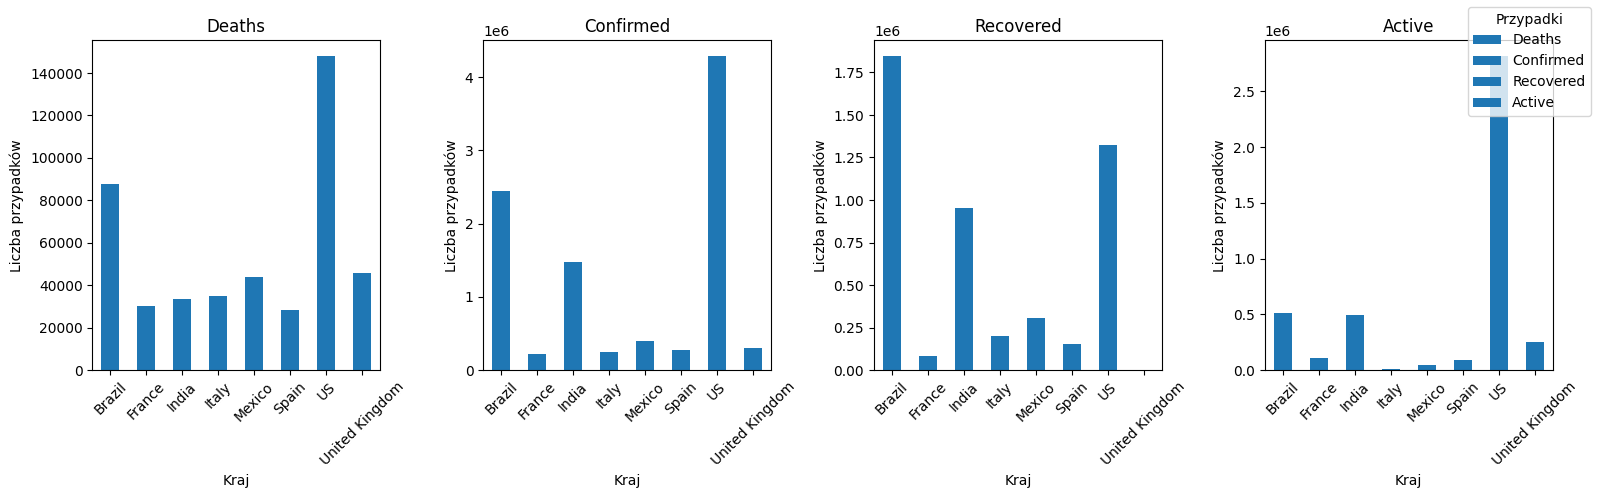

In [18]:

over_20k_countries = df[df['Deaths'] >= 20000]
countries = over_20k_countries

countries.set_index('Country/Region', inplace=True)

# Tworzenie wykresu
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

# Kolumny do wykresów
columns = ['Deaths', 'Confirmed', 'Recovered', 'Active']

# Tworzenie wykresów dla każdej kolumny
for i, column in enumerate(columns):
    countries[column].plot(kind='bar', ax=axes[i], color='C0')
    axes[i].set_title(column)
    axes[i].set_ylabel('Liczba przypadków')
    axes[i].set_xlabel('Kraj')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend().set_visible(False)

# Dodanie legendy
fig.legend(columns, loc='upper right', title='Przypadki')

# Dopasowanie układu
plt.tight_layout()
plt.show()

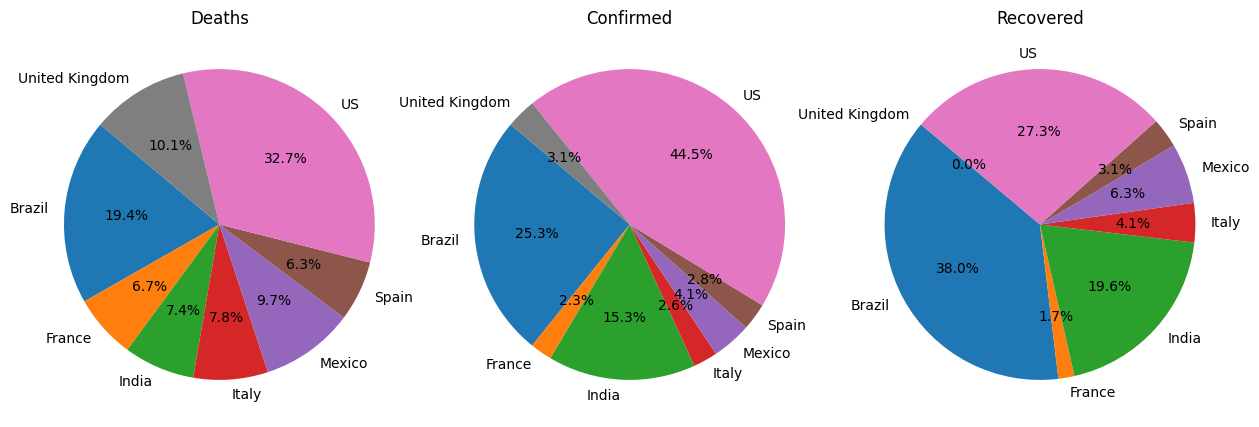

In [19]:
over_20k_countries = df[df['Deaths'] >= 20000]

countries = over_20k_countries

# Ustawienie indeksu na 'Country/Region'
countries.set_index('Country/Region', inplace=True)

# Tworzenie kopii DataFrame'u
countries_copy = countries.copy()

# Zmiana wartości dla krajów z liczbą zgonów poniżej 20,000 na 'Rest of the world'
rest_of_world_deaths = countries [countries['Deaths'] < 20000]['Deaths'].sum()
if rest_of_world_deaths > 0:
    countries_copy.loc['Rest of the world'] = rest_of_world_deaths

# Tworzenie wykresu kołowego dla kolumny Deaths
plt.figure(figsize=(15, 5))

# Wykres kołowy dla Deaths
plt.subplot(1, 3, 1)
plt.pie(countries_copy['Deaths'], labels=countries_copy.index, autopct='%1.1f%%', startangle=140)
plt.title('Deaths')
plt.axis('equal')  # Ustawienie równych proporcji, aby uzyskać koło

# Wykres kołowy dla Confirmed
plt.subplot(1, 3, 2)
plt.pie(countries['Confirmed'], labels= countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Confirmed')
plt.axis('equal')

# Wykres kołowy dla Recovered
plt.subplot(1, 3, 3)
plt.pie(countries['Recovered'], labels=countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Recovered')
plt.axis('equal')

plt.show()

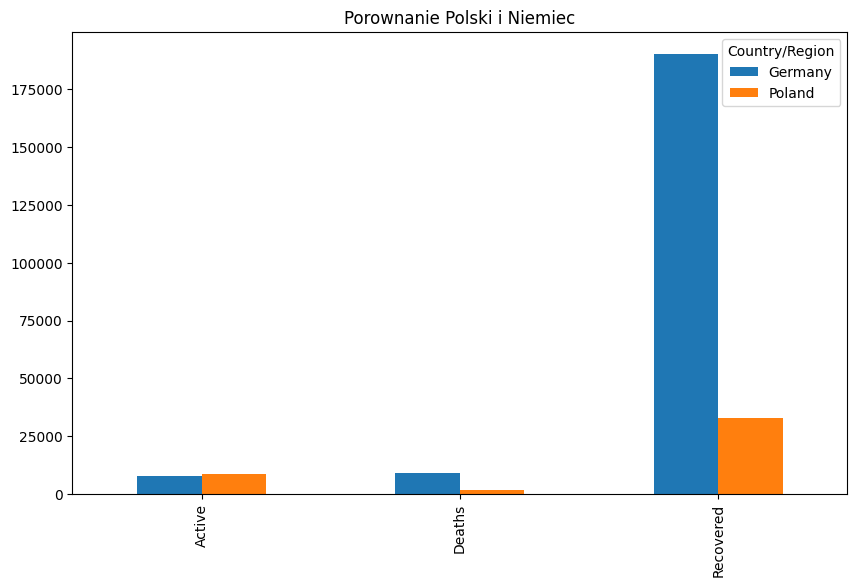

In [20]:
#Porownanie Polski i Niemiec

import pandas as pd
import matplotlib.pyplot as plt



# 1. Filtrowanie danych dla Polski i Niemiec
selected_countries = df[df['Country/Region'].isin(['Poland', 'Germany'])]

# 2. Wybieranie tylko interesujących nas kolumn
columns_of_interest = ['Deaths', 'Active', 'Recovered']
filtered_data = selected_countries[['Country/Region'] + columns_of_interest]

# 3. Tworzenie tabeli przestawnej
comparison_table = filtered_data.pivot_table(index='Country/Region', aggfunc='mean')

# 4. Wizualizacja danych
comparison_table.T.plot(kind='bar', figsize=(10, 6))
plt.title('Porownanie Polski i Niemiec')
plt.show()



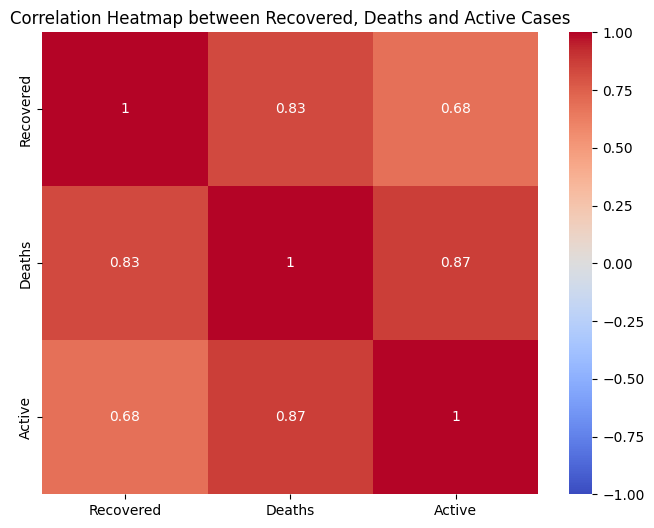

In [21]:
#Heatmapa korelacji miedzy kolumnami

plt.figure(figsize=(8, 6))
sns.heatmap(df[['Recovered', 'Deaths', 'Active']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Recovered, Deaths and Active Cases')
plt.show()

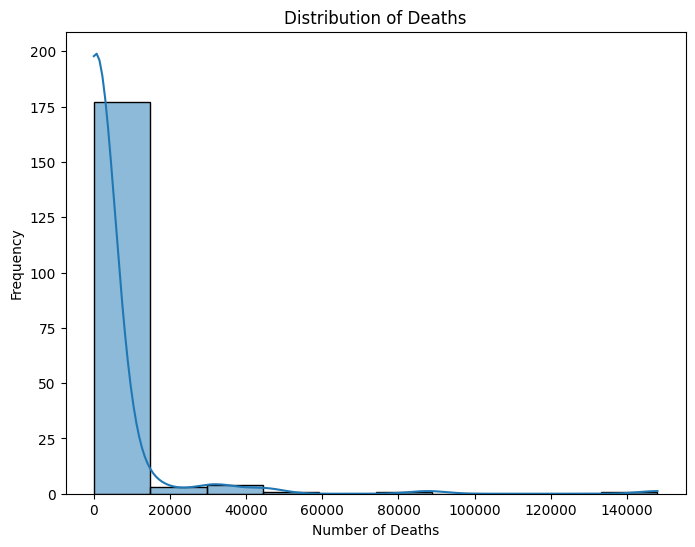

In [22]:
# Histogram dla liczby zgonów
plt.figure(figsize=(8, 6))
sns.histplot(df['Deaths'], bins=10, kde=True)
plt.title('Distribution of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.show()


In [28]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

# Tworzenie instancji LabelEncoder
label_encoder = LabelEncoder()

# Dopasowanie i transformacja kolumny 'Region'
df['Region_LabelEncoded'] = label_encoder.fit_transform(df['Country/Region'])

df


Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50                  69.49   
1             6             63                2.95                  56.25   
2             8            749                4.16                  67.34   
3             0              0                5.73                  88.53   
4             1              0                4.32                  25.47   
..          ...            ...                 ...                    ...   
182           2              0                0.73                  35.33   
183           0              0               10.00                  80.00   
184           4             36               28.56                  49.26   
185           1            465                3.08                  61.84   
186           2             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                      5.04                35526            737   
1                      5.25                 4171            709   
2                      6.17                23691           4282   
3                      6.48                  884             23   
4                     16.94                  749            201   
..                      ...                  ...            ...   
182                    2.08                 8916           1705   
183                   12.50                   10              0   
184                   57.98                 1619             72   
185                    4.97                 3326           1226   
186                    6.64                 1713            991   

     1 week % increase             WHO Region  New_Deaths  New_Recovered  \
0                 2.07  Eastern Mediterranean        10.0           18.0   
1                17.00                 Europe         6.0           63.0   
2                18.07                 Africa         8.0          749.0   
3                 2.60                 Europe         0.0            0.0   
4                26.84                 Africa         1.0            0.0   
..                 ...                    ...         ...            ...   
182              19.12  Eastern Mediterranean         2.0            0.0   
183               0.00                 Africa         0.0            0.0   
184               4.45  Eastern Mediterranean         4.0           36.0   
185              36.86                 Africa         1.0          465.0   
186              57.85                 Africa         2.0           24.0   

     Region_LabelEncoded  
0                      0  
1                      1  
2                      2  
3                      3  
4                      4  
..                   ...  
182                  182  
183                  183  
184                  184  
185                  185  
186                  186  

[187 rows x 18 columns]

In [27]:
# One-Hot Encoding za pomocą get_dummies

df_encoded = pd.get_dummies(df, columns=['Country/Region'], prefix='Region')

df_encoded


Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0        36263    1269      25198    9796        106          10   
1         4880     144       2745    1991        117           6   
2        27973    1163      18837    7973        616           8   
3          907      52        803      52         10           0   
4          950      41        242     667         18           1   
..         ...     ...        ...     ...        ...         ...   
182      10621      78       3752    6791        152           2   
183         10       1          8       1          0           0   
184       1691     483        833     375         10           4   
185       4552     140       2815    1597         71           1   
186       2704      36        542    2126        192           2   

     New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0               18                3.50                  69.49   
1               63                2.95                  56.25   
2              749                4.16                  67.34   
3                0                5.73                  88.53   
4                0                4.32                  25.47   
..             ...                 ...                    ...   
182              0                0.73                  35.33   
183              0               10.00                  80.00   
184             36               28.56                  49.26   
185            465                3.08                  61.84   
186             24                1.33                  20.04   

     Deaths / 100 Recovered  ...  Region_United Kingdom  Region_Uruguay  \
0                      5.04  ...                  False           False   
1                      5.25  ...                  False           False   
2                      6.17  ...                  False           False   
3                      6.48  ...                  False           False   
4                     16.94  ...                  False           False   
..                      ...  ...                    ...             ...   
182                    2.08  ...                  False           False   
183                   12.50  ...                  False           False   
184                   57.98  ...                  False           False   
185                    4.97  ...                  False           False   
186                    6.64  ...                  False           False   

     Region_Uzbekistan Region_Venezuela  Region_Vietnam  \
0                False            False           False   
1                False            False           False   
2                False            False           False   
3                False            False           False   
4                False            False           False   
..                 ...              ...             ...   
182              False            False           False   
183              False            False           False   
184              False            False           False   
185              False            False           False   
186              False            False           False   

     Region_West Bank and Gaza  Region_Western Sahara  Region_Yemen  \
0                        False                  False         False   
1                        False                  False         False   
2                        False                  False         False   
3                        False                  False         False   
4                        False                  False         False   
..                         ...                    ...           ...   
182                       True                  False         False   
183                      False                   True         False   
184                      False                  False          True   
185                      False                  False         False   
186             

Wykresy rozrzutu dla wybranych kolumn

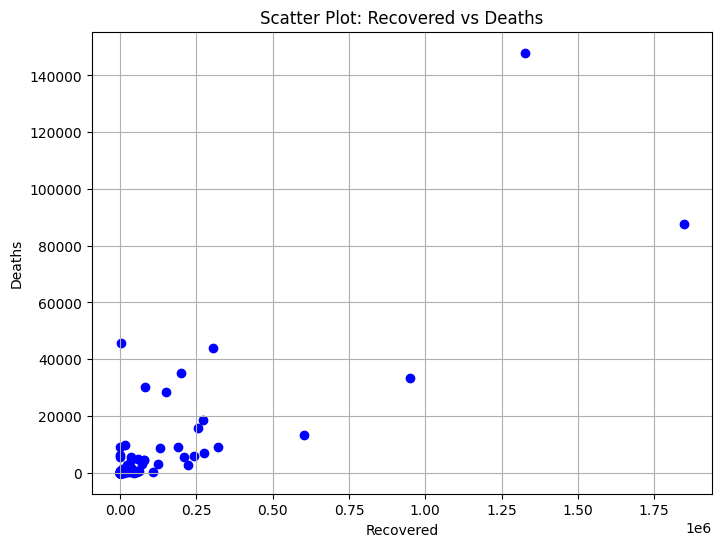

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Recovered'], df['Deaths'], color='blue', marker='o')
plt.title('Scatter Plot: Recovered vs Deaths')
plt.xlabel('Recovered')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()

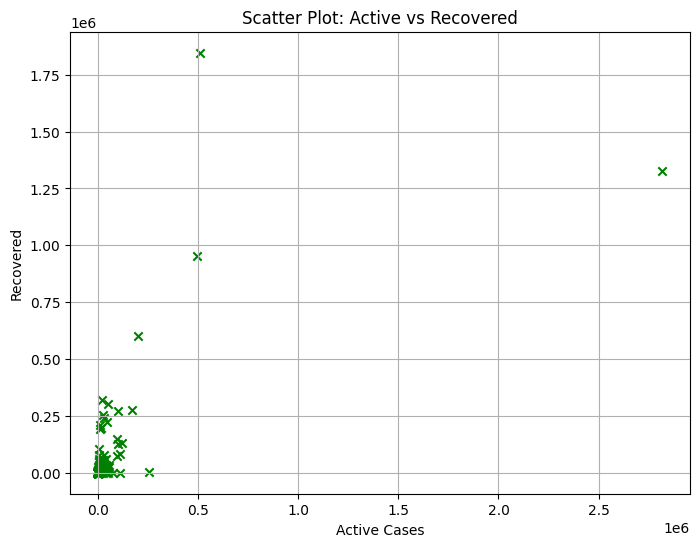

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Active'], df['Recovered'], color='green', marker='x')
plt.title('Scatter Plot: Active vs Recovered')
plt.xlabel('Active Cases')
plt.ylabel('Recovered')
plt.grid(True)
plt.show()